# Predicitive Modelling

Importing libraries and loading data from csv

In [234]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display

from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

data = pd.read_csv("ai_job_trends_dataset.csv")

## Classification

First I'm going to solve a calssification problem since it is easier and it is still tied to the main question - What will the job market look like in the future?. So the models are going to try and predict job status (Increasing, decreasing).

1. Making copy of the original dataset then encoding target variable ('Job Status') and categorical features

In [235]:
#Copy
data_class = data.copy()

#Target
data_class['Job Status'] = data_class['Job Status'].map({'Increasing': 1, 'Decreasing': 0})

#Features
data_class_encoded = pd.get_dummies(data_class, drop_first=True)

2. Splitting categorical features and target

In [236]:
X = data_class_encoded.drop("Job Status", axis=1)
y = data_class_encoded["Job Status"]

3. Train/test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

4. Training predictive models and evaluating performance

Random Forest Accuracy: 0.49366666666666664


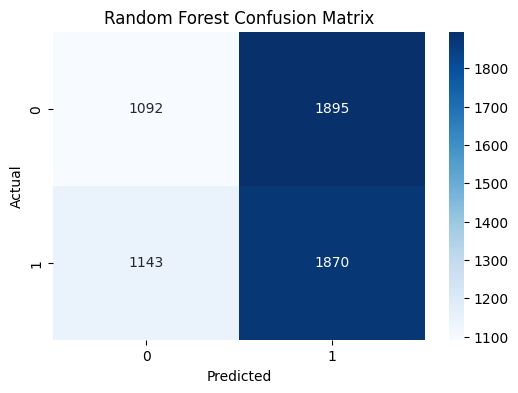

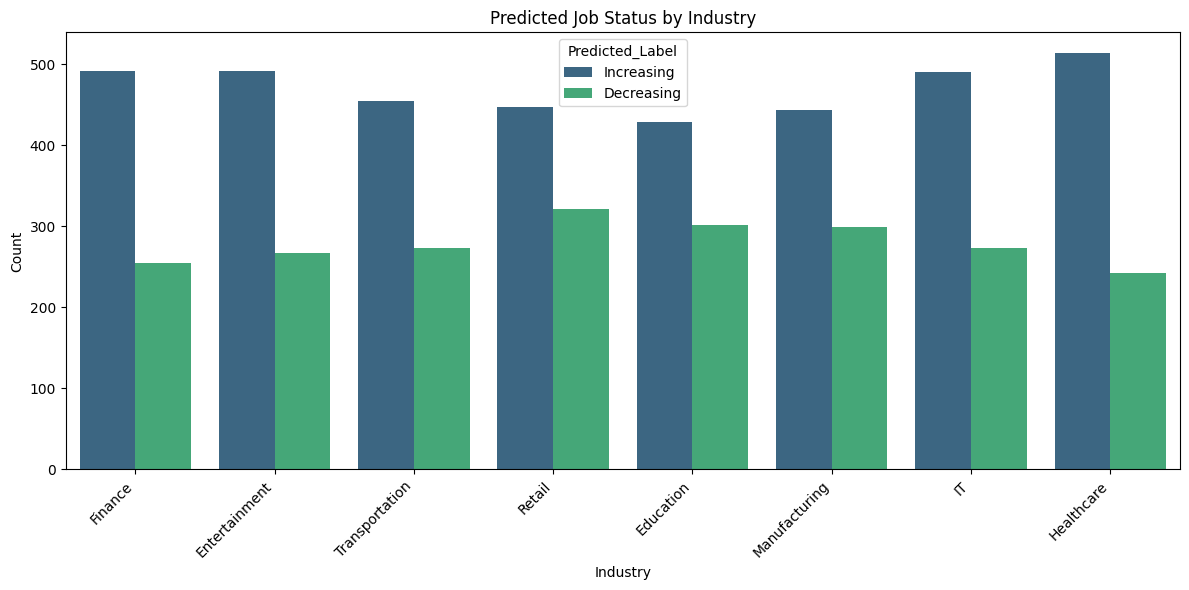

In [ ]:
#Random forest
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=48,
    min_samples_split=10,    
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1 
)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

#Confusion matrix
cm = confusion_matrix(y_test, rf_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

#Predictions by industry

#Making a copy so we don't edit the original data
X_test_with_data = X_test.copy()

#Using the original data Industry values
X_test_with_data["Industry"] = data["Industry"]

X_test_with_data["Actual"] = y_test.values #Not needed but for convenience
X_test_with_data["Predicted"] = rf_pred

#Map numeric predictions to labels so it is easier to read on plots
status_map = {0: "Decreasing", 1: "Increasing"}
X_test_with_data["Predicted_Label"] = X_test_with_data["Predicted"].map(status_map)

#Plot counts of predictions grouped by industry
plt.figure(figsize=(12,6))
sns.countplot(data=X_test_with_data, 
              x="Industry", 
              hue="Predicted_Label",
              palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Predicted Job Status by Industry")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

KNN Accuracy: 0.4965


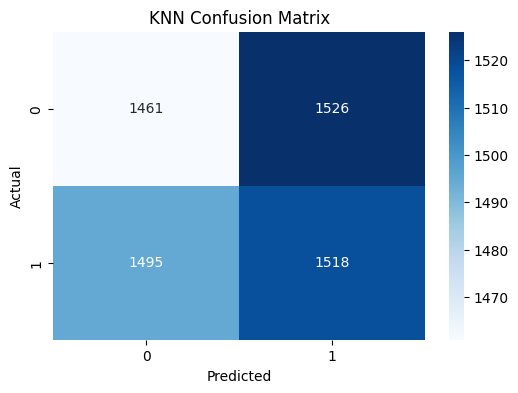

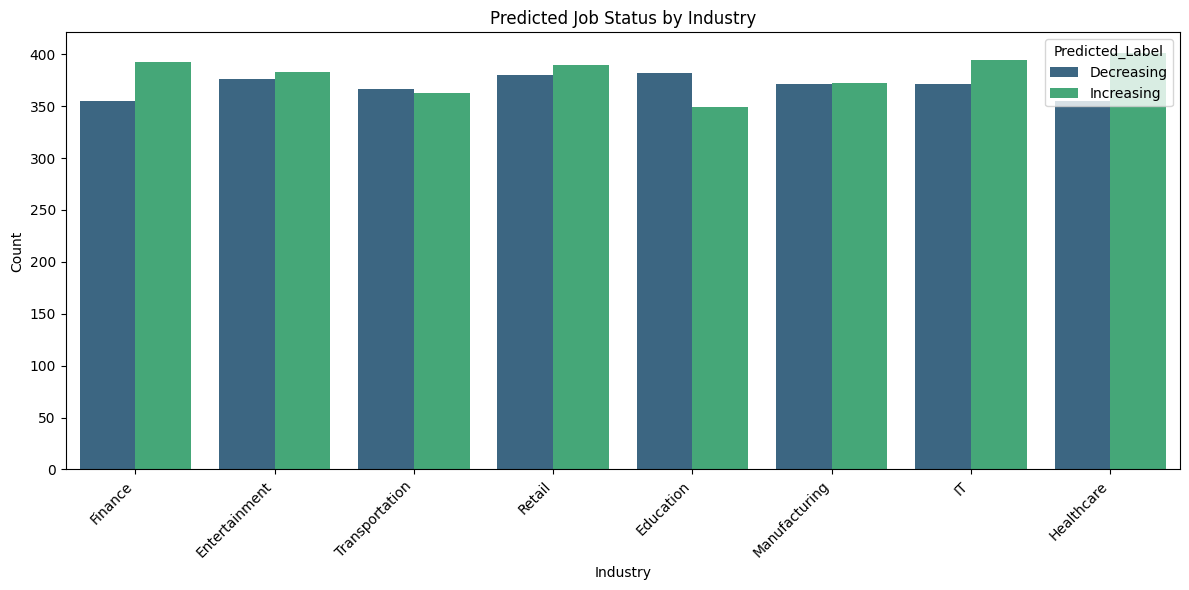

In [ ]:
#KNN
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train_s, y_train)
knn_pred = knn.predict(X_test_s)

print("KNN Accuracy:", accuracy_score(y_test, knn_pred))

#Confusion matrix
cm = confusion_matrix(y_test, knn_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("KNN Confusion Matrix")
plt.show()

#Predictions by industry

#Making a copy so we don't edit the original data
X_test_with_data = X_test.copy()

#Using the original data Industry values
X_test_with_data["Industry"] = data["Industry"]

X_test_with_data["Actual"] = y_test.values #Not needed but for convenience
X_test_with_data["Predicted"] = knn_pred

#Map numeric predictions to labels so it is easier to read on plots
status_map = {0: "Decreasing", 1: "Increasing"}
X_test_with_data["Predicted_Label"] = X_test_with_data["Predicted"].map(status_map)

#Plot counts of predictions grouped by industry
plt.figure(figsize=(12,6))
sns.countplot(data=X_test_with_data, 
              x="Industry", 
              hue="Predicted_Label",
              palette="viridis")

plt.xticks(rotation=45, ha="right")
plt.title("Predicted Job Status by Industry")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

## Findings

**Random Forest**
Accuracy: 0.4937

The Random Forest model performed poorly and tended to be optimistic in its predictions. It frequently classified job outlooks as "increasing" across most industries, suggesting the model failed to differentiate between the classes based on the provided features. This kind of prediction bias often appears when the model cannot detect reliable decision boundaries.

**K-neighbours**
Accuracy: 0.4965

The KNN classifier performed similarly but showed a slightly more balanced distribution between “increasing” and “decreasing” predictions. Despite this, the accuracy still remained close to chance level. KNN is sensitive to noise, and the randomness of the dataset likely prevented local patterns from forming in the feature space.

#### Conclusion

The classification task produced overall weak results, with both models achieving accuracy scores close to random guessing. The primary reason is likely because the features appear highly random and show little to no meaningful correlation with the target variable. As a result, the models struggle to learn any consistent patterns.

## Regression

Now moving onto the main part - trying to predict projected job openings in 2030, this is a regression problem

1. Making a copy of the original dataset, splitting features and target then encoding categorical features

In [ ]:
#Copy
data_reg = data.copy()

X_orig = data_reg.drop(columns=["Projected Openings (2030)"]) #Save for later

#Target
y = data_reg["Projected Openings (2030)"]

#Features
X = pd.get_dummies(X_orig, drop_first=True)

2. Train/Test split

In [ ]:
X_train, X_test, y_train, y_test, X_train_orig, X_test_orig = train_test_split(
    X, y, X_orig, test_size=0.2, random_state=42
)

#Originally didn't include this, but this is supposed to help with values that are highly skewed (which we don't have)
#So I still tried it, to see if and how it changed the results - the results still stayed the same - mediocre
y_train_log = np.log1p(y_train)
y_test_log = np.log1p(y_test)

3. Training predictive models and evaluating performance

In [ ]:
#Random forest
rf = RandomForestRegressor(
    n_estimators=500,
    max_depth=24,
    min_samples_split=10,    
    min_samples_leaf=4,
    random_state=42,
    n_jobs=-1 
)
rf.fit(X_train, y_train_log)

#Trained on log -> must predict on log
#Predict on log -> must convert back to real scale
rf_pred_log = rf.predict(X_test)
rf_pred = np.expm1(rf_pred_log)  # back-transform to original scale

#MAE and MSE
#“How wrong is the model on average?”
mae = mean_absolute_error(y_test, rf_pred)
#“How large are the errors, with big errors punished even more?”
mse = mean_squared_error(y_test, rf_pred)
rmse = np.sqrt(mse)
#"How much of the variation in the target variable the model can explain?"
r2 = r2_score(y_test, rf_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}") #Lower = better
print(f"Mean Squared Error (MSE): {mse:.2f}") #Lower = better
print(f"Root MSE (RMSE): {rmse:.2f}") #Lower = better
print(f"R² score: {r2:.3f}") #Closer to 1 = better

#Predictions by job
pred_table = X_test_orig.copy()  # make a copy of the data
pred_table["Predicted_Projected_Openings_2030"] = rf_pred

#Select only relevant columns for display and sort descending
pred_table_display = pred_table[["Job Title", "Predicted_Projected_Openings_2030"]].sort_values(by="Predicted_Projected_Openings_2030", ascending=False)

display(pred_table_display)

Mean Absolute Error (MAE): 2607.39
Mean Squared Error (MSE): 9477488.60
Root MSE (RMSE): 3078.55
R² score: -0.160


,Job Title,Predicted_Projected_Openings_2030
29215,"Designer, jewellery",4574.321042
2213,Microbiologist,4540.127953
22108,Higher education careers adviser,4477.491154
17166,Health service manager,4465.024688
22771,Speech and language therapist,4392.676402
...,...,...
1050,"Psychologist, occupational",2228.048036
27923,Private music teacher,2195.983048
316,"Psychologist, occupational",2037.146754
22200,"Psychologist, occupational",2032.363398


In [ ]:
#KNN
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train_s, y_train_log)

#Trained on log -> must predict on log
#Predict on log -> must convert back to real scale
knn_pred_log = knn.predict(X_test_s)
knn_pred = np.expm1(knn_pred_log)  # back-transform to original scale

#MAE and MSE
#“How wrong is the model on average?”
mae = mean_absolute_error(y_test, knn_pred)
#“How large are the errors, with big errors punished even more?”
mse = mean_squared_error(y_test, knn_pred)
rmse = np.sqrt(mse)
#"How much of the variation in the target variable the model can explain?"
r2 = r2_score(y_test, knn_pred)

print(f"Mean Absolute Error (MAE): {mae:.2f}") #Lower = better
print(f"Mean Squared Error (MSE): {mse:.2f}") #Lower = better
print(f"Root MSE (RMSE): {rmse:.2f}") #Lower = better
print(f"R² score: {r2:.3f}") #Closer to 1 = better

#Predictions by job
pred_table = X_test_orig.copy()  # make a copy of the data
pred_table["Predicted_Projected_Openings_2030"] = knn_pred

#Select only relevant columns for display and sort descending
pred_table_display = pred_table[["Job Title", "Predicted_Projected_Openings_2030"]].sort_values(by="Predicted_Projected_Openings_2030", ascending=False)

display(pred_table_display)

Mean Absolute Error (MAE): 2777.05
Mean Squared Error (MSE): 11180304.25
Root MSE (RMSE): 3343.70
R² score: -0.368


,Job Title,Predicted_Projected_Openings_2030
20290,Ophthalmologist,8940.680480
1412,Radio broadcast assistant,8901.096373
10612,Music tutor,8836.929213
1807,Garment/textile technologist,8716.942158
26901,Energy manager,8667.264263
...,...,...
3942,Acupuncturist,832.604541
13694,"Engineer, production",822.829860
16860,Personal assistant,763.045739
8304,"Psychologist, prison and probation services",746.544815


## Findings

After extensive experimentation and parameter tuning on multiple regression models (Random Forest Regressor, KNN Regressor and Linear Regression), the results remained consistently poor.
The key indicators - **MAE**, **MSE**, **RMSE**, and the **R²** score show that the models are unable to make meaningful predictions for **Projected Job Openings (2030)**.

#### Why the results are poor

The main reasons are:
+ Low correlation between features and the target - Analysis suggest that none of the input variables strongly predict future job openings.
+ Highly noisy target values - Job opening projections vary widely.
+ Categorical-heavy dataset - Many features require one-hot encoding, which can create hundreds of sparse dummy variables.
+ Small dataset + high dimensionality - This leads to overfitting during training and poor generalization on unseen data.

#### Interpretation of the metrics

**MAE** and **MSE** are very large, meaning the average prediction error is thousands of job openings.

**RMSE** shows huge variability, which the model cannot capture.

**R²** is negative, indicating that even a trivial model predicting the mean for every job performs better than the trained models.

#### Conclusion

Overall, the regression task is not feasible with the available data. The models cannot learn stable patterns because the features do not contain meaningful predictive information for long-term job opening projections.